# Importation des bibliothèques

In [270]:
import sys
sys.path.insert(0, '..')

In [303]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare
from loss  import MSELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Régression Linéaire

### Génération des données

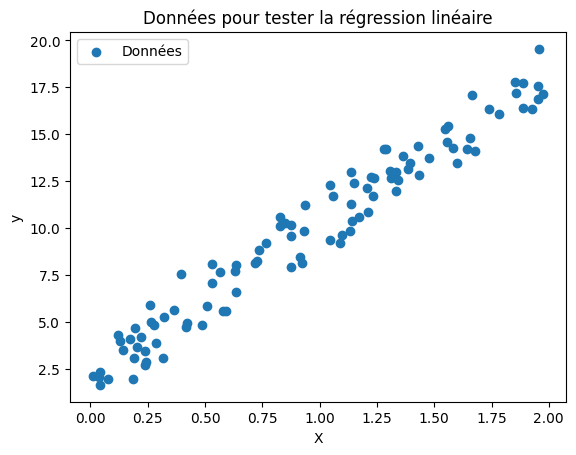

In [272]:
np.random.seed(0)

X = 2 * np.random.rand(100, 1)

a = 8
b = 2

noise = np.random.randn(100, 1)
y = a * X + b + noise

plt.scatter(X, y , label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Données pour tester la régression linéaire')
plt.legend()
plt.show()

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print("X ", X.shape)
print('Train :', X_train.shape)
print('Test :', X_test.shape)

X  (100, 1)
Train : (80, 1)
Test : (20, 1)


In [275]:
linear_module = Module_lineare(X.shape[1], 1 , True)
loss = MSELoss()
learning_rate = 1e-3

train_losses = []
test_losses = []
test_accuracies = []
best_params = None
loss_min = math.inf

nb_epochs = 200

for epoch in range(nb_epochs):
    linear_module.zero_grad()

    # Forward pass
    y_train_pred = linear_module.forward(X_train)
    loss_train = loss.forward(y_train, y_train_pred)
    train_losses.append(np.mean(loss_train))

    # Backward pass
    gradient_loss = loss.backward(y_train, y_train_pred)
    delta_linear = linear_module.backward_delta(X_train, gradient_loss)

    # Mise à jour des paramètres
    linear_module.backward_update_gradient(X_train, gradient_loss)
    linear_module.update_parameters(learning_rate)
    if np.mean(loss_train) < np.mean(loss_min) :
        best_params = linear_module.get_parameters()
        loss_min = loss_train
    # else :
    #     linear_module.set_parameters(best_params)

    # Test accuracy
    y_test_pred = linear_module.forward(X_test)
    loss_test = loss.forward(y_test, y_test_pred)
    test_losses.append(np.mean(loss_test))

    print(f"Epoch {epoch+1}, Loss: {np.mean(loss_train)}")

Epoch 1, Loss: 180.04736705550653
Epoch 2, Loss: 83.51015204620867
Epoch 3, Loss: 39.280575333872946
Epoch 4, Loss: 19.00203988056097
Epoch 5, Loss: 9.69119683340744
Epoch 6, Loss: 5.403446781750519
Epoch 7, Loss: 3.4169335721820318
Epoch 8, Loss: 2.4853601274943986
Epoch 9, Loss: 2.0380282488403645
Epoch 10, Loss: 1.8135712575008391
Epoch 11, Loss: 1.6922558124819311
Epoch 12, Loss: 1.6191999637926475
Epoch 13, Loss: 1.5692178232422243
Epoch 14, Loss: 1.5307232713038552
Epoch 15, Loss: 1.4983599815605653
Epoch 16, Loss: 1.4696268579876532
Epoch 17, Loss: 1.4433328081833108
Epoch 18, Loss: 1.4188890992503915
Epoch 19, Loss: 1.395985214959277
Epoch 20, Loss: 1.3744403095316078
Epoch 21, Loss: 1.3541350670613737
Epoch 22, Loss: 1.334980382324305
Epoch 23, Loss: 1.3169029072379808
Epoch 24, Loss: 1.2998383257290569
Epoch 25, Loss: 1.283728173104714
Epoch 26, Loss: 1.2685182839653475
Epoch 27, Loss: 1.2541579911056768
Epoch 28, Loss: 1.240599673312132
Epoch 29, Loss: 1.2277984676739113
Epo

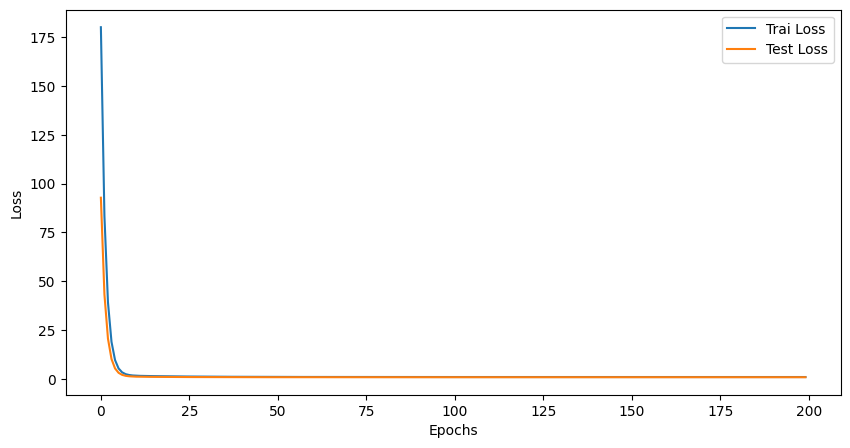

In [276]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Trai Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

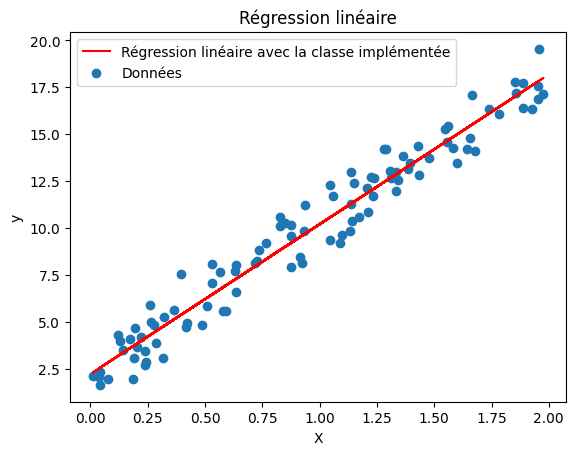

In [277]:


plt.plot(X_train, y_train_pred, 'r-', label='Régression linéaire avec la classe implémentée')
plt.scatter(X, y, label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Régression linéaire')
plt.legend()
plt.show()

### Avec Sklearn

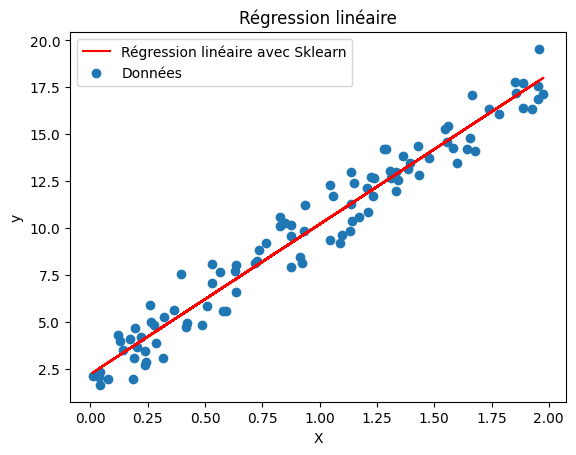

In [278]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_sickit = model.predict(X_train)

plt.plot(X_train, pred_sickit, 'r-', label='Régression linéaire avec Sklearn')
plt.scatter(X, y, label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Régression linéaire')
plt.legend()
plt.show()

# 2. Classification

### Génération des données

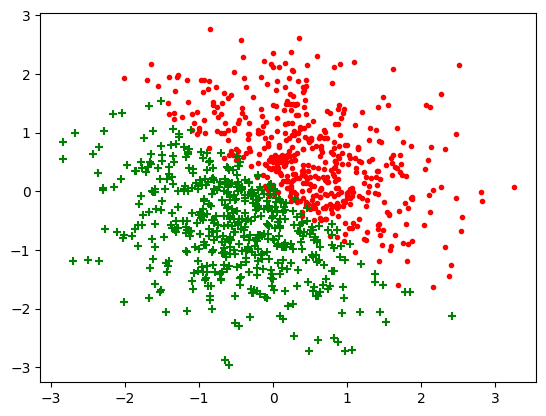

In [360]:
np.random.seed(0)
n_samples = 1000
n_features = 2
noise=0.1

X = np.random.randn(n_samples, n_features) 
w = np.random.randn(n_features)
b = np.random.randn(1) 
y = np.sign(np.dot(X, w) + b)  
y[y == -1] = 0 
y = y.reshape(-1, 1)  
X += noise * np.random.randn(n_samples, n_features)


ut.plot_data(X, y)

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print("X ", X.shape)
print('Train :', X_train.shape)
print('Test :', X_test.shape)



X  (1000, 2)
Train : (800, 2)
Test : (200, 2)


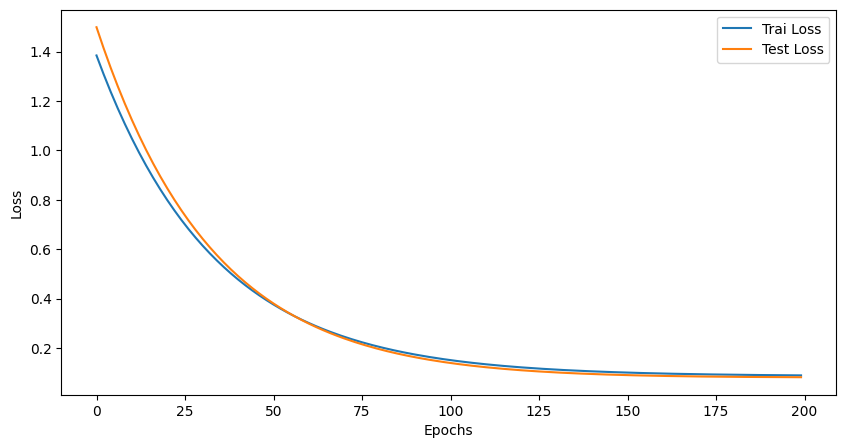

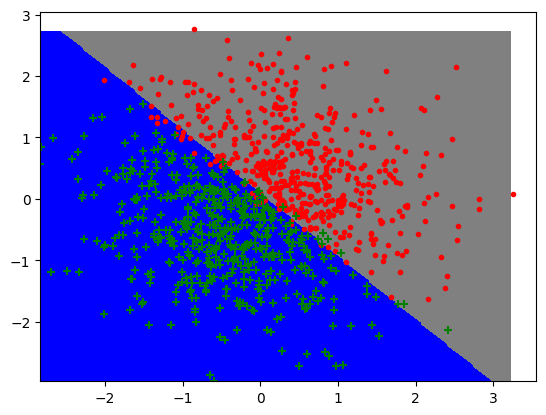

In [364]:
linear_module = Module_lineare(X.shape[1], 1 , True)
loss = MSELoss()
learning_rate = 1e-5

train_losses = []
test_losses = []
test_accuracies = []
best_params = None
loss_min = math.inf

nb_epochs = 200

for epoch in range(nb_epochs):
    linear_module.zero_grad()

    # Forward pass
    y_train_pred = linear_module.forward(X_train)
    loss_train = loss.forward(y_train, y_train_pred)
    train_losses.append(np.mean(loss_train))

    # Backward pass
    gradient_loss = loss.backward(y_train, y_train_pred)
    delta_linear = linear_module.backward_delta(X_train, gradient_loss)

    # Mise à jour des paramètres
    linear_module.backward_update_gradient(X_train, gradient_loss)
    linear_module.update_parameters(learning_rate)
    if np.mean(loss_train) < np.mean(loss_min) :
        best_params = linear_module.get_parameters()
        loss_min = loss_train

    # Test accuracy
    y_test_pred = linear_module.forward(X_test)
    loss_test = loss.forward(y_test, y_test_pred)
    test_losses.append(np.mean(loss_test))

    #print(f"Epoch {epoch+1}, Loss: {np.mean(loss_train)}")

def predict(x):
    return np.where(linear_module.forward(x) >= 0.5,1, 0)

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Trai Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
ut.plot_frontiere(X, predict, step=200)
ut.plot_data(X, y)
plt.show()